In this example, we have some prepared 200x200 pixel pictures of 4 shapes. 
- Circle
- Square
- Triangle
- Star

our purpose is to train a ANN which can guess the shape of test data.

First, we import the libraries which is needed.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from os.path import join, abspath, dirname, curdir
from os import listdir
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow import argmax, math

## Preparing Data
 
We will convert the pictures into Numpy arrays with 'imread', for example you can see the code to conevert one of the sample pictures into array 

In [3]:
x = imread('./shapes/circle/0.png')
x.shape

(200, 200)

In [4]:
root_path = join(curdir, 'shapes')
shapes_list = listdir(root_path)
data_list = []
target_list = []
for shape in shapes_list:
    for image in listdir(join(root_path, shape)):
        try:
            data_list.append((imread(join(root_path, shape, image)).ravel(),shape))
            # target_list.append(shape)
        except Exception as e:
            print(e)
            print(join(root_path, shape, image))


In [5]:
data_list

[(array([1., 1., 1., ..., 1., 1., 1.], dtype=float32), 'circle'),
 (array([1., 1., 1., ..., 1., 1., 1.], dtype=float32), 'circle'),
 (array([1., 1., 1., ..., 1., 1., 1.], dtype=float32), 'circle'),
 (array([1., 1., 1., ..., 1., 1., 1.], dtype=float32), 'circle'),
 (array([1., 1., 1., ..., 1., 1., 1.], dtype=float32), 'circle'),
 (array([1., 1., 1., ..., 1., 1., 1.], dtype=float32), 'circle'),
 (array([1., 1., 1., ..., 1., 1., 1.], dtype=float32), 'circle'),
 (array([1., 1., 1., ..., 1., 1., 1.], dtype=float32), 'circle'),
 (array([1., 1., 1., ..., 1., 1., 1.], dtype=float32), 'circle'),
 (array([1., 1., 1., ..., 1., 1., 1.], dtype=float32), 'circle'),
 (array([1., 1., 1., ..., 1., 1., 1.], dtype=float32), 'circle'),
 (array([1., 1., 1., ..., 1., 1., 1.], dtype=float32), 'circle'),
 (array([1., 1., 1., ..., 1., 1., 1.], dtype=float32), 'circle'),
 (array([1., 1., 1., ..., 1., 1., 1.], dtype=float32), 'circle'),
 (array([1., 1., 1., ..., 1., 1., 1.], dtype=float32), 'circle'),
 (array([1

now we have our data in 'data_list' list. But, there is a problem. We want to give the first ten thousnds of data for training. but our data is not mix and all the same types of shapes are together and when we are going to seperate our train an test, there is a posibility that some of the shapes never train. So, we are going to shuffle our data to have all sorts of shapes in our train

In [5]:
np.random.shuffle(data_list)

The array of shapes are going to be our X and the shape is going to be our target in y

In [6]:
X = np.array([data[0] for data in data_list])
y = np.array([data[1] for data in data_list])

In [7]:
X.shape, y.shape

((14970, 40000), (14970,))

Now, we are going to seperate our train, validation and test sets

In [8]:
X_train = X[:10000]
y_train = y[:10000]

X_val = X[10000:12000]
y_val = y[10000:12000]

X_test = X[12000:]
y_test = y[12000:]


In [9]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((10000, 40000), (10000,), (2000, 40000), (2000,), (2970, 40000), (2970,))

Now we are going to map our targets into numbers and then categorized them to turn them into OneHotEncoded.

As you can see, circle is equal to 0, Square is equal to 1, Star is equal to 2 and Triangle is equal to 3

In [10]:
def shape2num(x):
    if x == 'circle':
        return 0
    elif x == 'square':
        return 1
    elif x == 'star':
        return 2
    elif x == 'triangle':
        return 3
    
y_train_new = list(map(shape2num, y_train))
y_val_new = list(map(shape2num, y_val))
y_test_new = list(map(shape2num, y_test))

In [11]:
y_train_new = to_categorical(y_train_new, num_classes=4)
y_val_new = to_categorical(y_val_new, num_classes=4)
y_test_new = to_categorical(y_test_new, num_classes=4)

In [12]:
y_train_new.shape, y_val_new.shape, y_test_new.shape

((10000, 4), (2000, 4), (2970, 4))

## Train Model

Now, we are going to create our Model, conpile it and then fit it. As you can see, our model is a Sequential of 3 layers of 'Dense'. Our loss function is going to be 'categorical_crossentropy' and our chosen optimizer is 'Adam'. At last, our metric will be Accuracy.

In [13]:
model = Sequential()

model.add(Dense(128, 'relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, 'relu'))
model.add(Dense(4, 'softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │     5,120,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,124,388 (19.55 MB)

 Trainable params: 5,124,388 (19.55 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
training_result = model.fit(
    X_train,
    y_train_new,
    epochs=36,
    batch_size=128,
    validation_data=(X_val, y_val_new)
)

Epoch 1/36
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - accuracy: 0.6178 - loss: 5.5100 - val_accuracy: 0.9960 - val_loss: 0.0285
Epoch 2/36
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - accuracy: 0.9924 - loss: 0.0368 - val_accuracy: 0.9965 - val_loss: 0.0307
Epoch 3/36
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - accuracy: 0.9949 - loss: 0.0264 - val_accuracy: 0.9885 - val_loss: 0.0607
Epoch 4/36
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - accuracy: 0.9936 - loss: 0.0302 - val_accuracy: 0.9960 - val_loss: 0.0182
Epoch 5/36
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - accuracy: 0.9953 - loss: 0.0226 - val_accuracy: 0.9980 - val_loss: 0.0151
Epoch 6/36
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - accuracy: 0.9953 - loss: 0.0218 - val_accuracy: 0.9985 - val_loss: 0.0110
Epoch 7/36
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - accuracy: 0.9955 - loss: 0.0170 - val_accuracy: 0.9965 - val_loss: 0.0112
Epoch 8/36
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.9967 - loss: 0.0149 - val_accuracy: 0.9965 - v

In [16]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)

def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):

    fig, ax = plt.subplots()

    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]

    for idx, metric in enumerate(metrics):
        ax.plot(metric, color=color[idx])

    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, 36])
    plt.ylim(ylim)
    # Tailor x-axis tick marks
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)
    plt.show()
    plt.close()

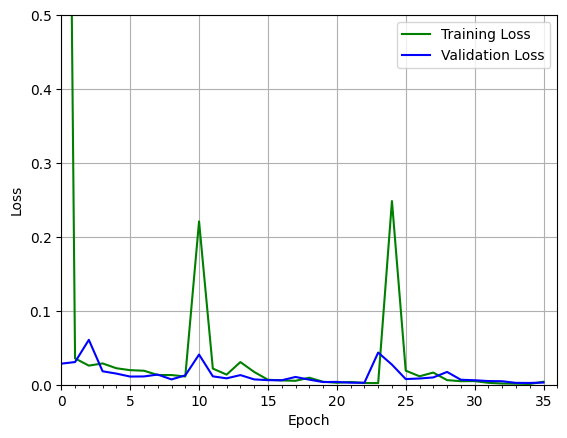

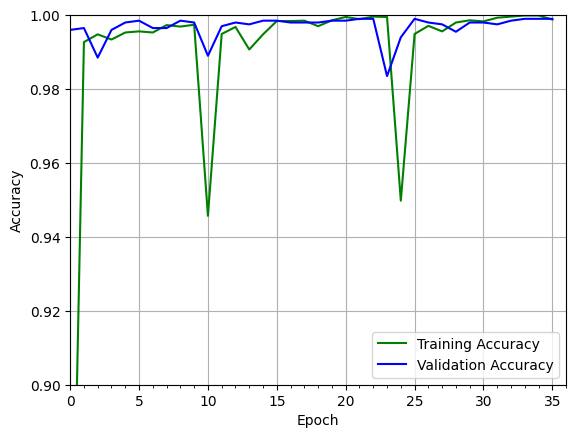

In [17]:
train_loss = training_result.history["loss"]
train_acc  = training_result.history["accuracy"]
valid_loss = training_result.history["val_loss"]
valid_acc  = training_result.history["val_accuracy"]

plot_results([ train_loss, valid_loss ],
            ylabel="Loss",
            ylim = [0.0, 0.5],
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);

plot_results([ train_acc, valid_acc ],
            ylabel="Accuracy",
            ylim = [0.9, 1.0],
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])

As you can see, our best accuracy on both train and validation set is on epoch 33.

## Test Our Model

In [18]:
predictions = model.predict(X_test)
index = 0 # up to 9999
print('Ground truth for test digit: ',y_test[index])
print('\n')
print('Predictions for each class:\n')
for i in range(4):
    print('digit:', i, ' probability: ', predictions[index][i])

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Ground truth for test digit:  circle


Predictions for each class:

digit: 0  probability:  0.9999995
digit: 1  probability:  4.994709e-07
digit: 2  probability:  1.5849465e-25
digit: 3  probability:  1.4974858e-18


In [19]:
# Generate predictions for the test dataset.
predictions = model.predict(X_test)

# For each sample image in the test dataset, select the class label with the highest probability.
predicted_labels = [np.argmax(i) for i in predictions]

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


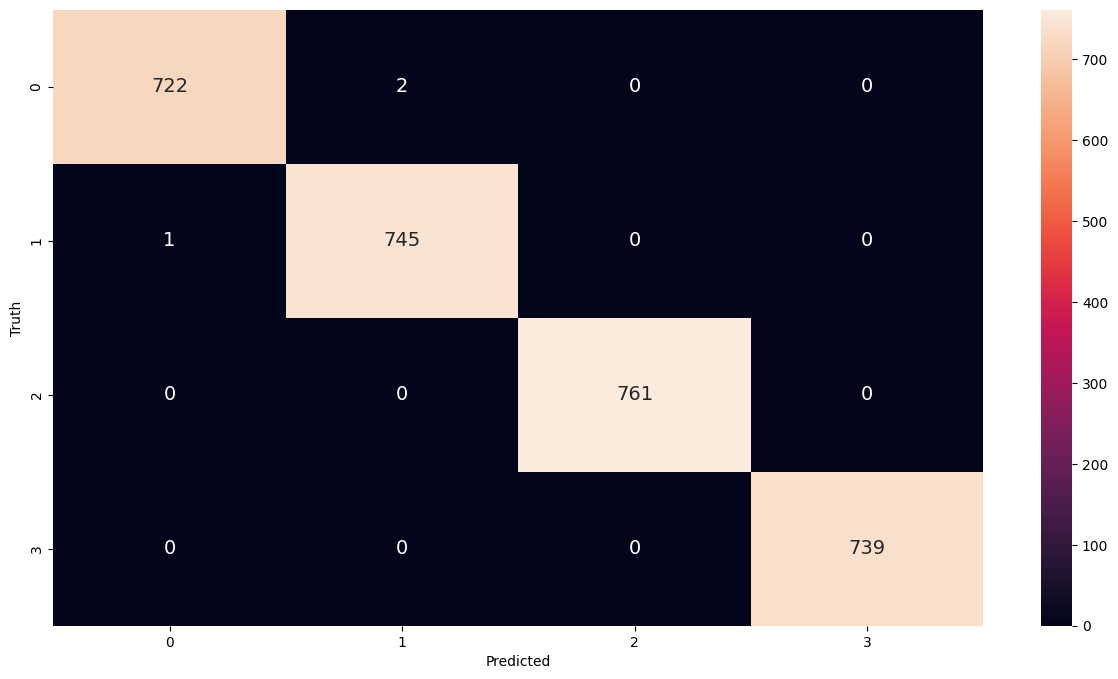

In [20]:
# Convert one-hot encoded labels to integers.
y_test_integer_labels = argmax(y_test_new, axis=1)

# Generate a confusion matrix for the test dataset.
cm = math.confusion_matrix(labels=y_test_integer_labels, predictions=predicted_labels)

# Plot the confusion matrix as a heatmap.
plt.figure(figsize=[15, 8])
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 14})
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

At last, it seems like that we have guessed all the test data set correctly, except for 10 shapes of circle that we have guessed they were squares